# Oak Wilt Data Analysis


## 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('../data/data_cleaned.csv')

print(f"Dataset loaded successfully!")
print(f"Total records: {len(df):,}")
print("\nFirst 5 rows:")
df.head()


Dataset loaded successfully!
Total records: 1,682

First 5 rows:


,Inspection_ID (unique),MORTALITY_CENTER_ID,INSPECTION_DATE,INSPECTION_DECADE,INSPECTION_YEAR,SPECIES,LATITUDE,LONGITUDE,LANDOWNER_TYPE,OAK_WILT_CONFIRMED,SYMPTOM_VEINAL_NECROSIS,SYMPTOM_MORTALITY_PATTERN
0,NaN,5758.00,8/24/86,1980s,1986,Live Oak,30.32,-97.77,Unknown,Yes,NaN,NaN
1,NaN,5723.00,3/11/87,1980s,1987,Live Oak,30.26,-97.80,Unknown,Yes,Yes,NaN
2,NaN,5782.00,3/17/88,1980s,1988,Live Oak,30.25,-97.76,Unknown,Yes,NaN,NaN
3,NaN,5807.00,5/6/88,1980s,1988,Live Oak,30.23,-97.86,Unknown,Yes,Yes,NaN
4,NaN,5689.00,12/6/88,1980s,1988,Live Oak,30.39,-97.69,Unknown,Yes,Yes,NaN


## 3. Dataset Overview

In [3]:
# Dataset shape
print("=" * 60)
print("DATASET SHAPE")
print("=" * 60)
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print()

# Column names and data types
print("=" * 60)
print("COLUMN INFORMATION")
print("=" * 60)
df.info()


DATASET SHAPE
Number of rows: 1,682
Number of columns: 12

COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Inspection_ID (unique)     0 non-null      float64
 1   MORTALITY_CENTER_ID        1636 non-null   float64
 2   INSPECTION_DATE            1682 non-null   object 
 3   INSPECTION_DECADE          1682 non-null   object 
 4   INSPECTION_YEAR            1682 non-null   int64  
 5   SPECIES                    1682 non-null   object 
 6   LATITUDE                   1682 non-null   float64
 7   LONGITUDE                  1682 non-null   float64
 8   LANDOWNER_TYPE             1664 non-null   object 
 9   OAK_WILT_CONFIRMED         1682 non-null   object 
 10  SYMPTOM_VEINAL_NECROSIS    650 non-null    object 
 11  SYMPTOM_MORTALITY_PATTERN  352 non-null    object 
dtypes: float64(4), int64(1), o

## 4. Missing Values Analysis

MISSING VALUES SUMMARY
                   Column  Missing_Count  Missing_Percentage
   Inspection_ID (unique)           1682              100.00
SYMPTOM_MORTALITY_PATTERN           1330               79.07
  SYMPTOM_VEINAL_NECROSIS           1032               61.36
      MORTALITY_CENTER_ID             46                2.73
           LANDOWNER_TYPE             18                1.07



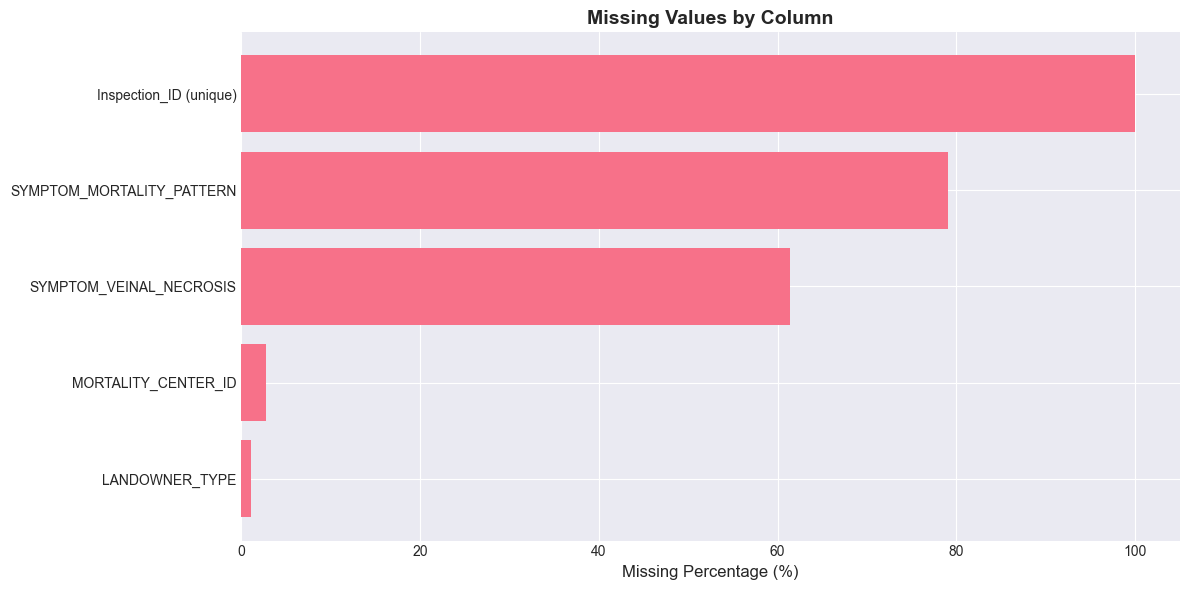

In [4]:
# Replace '<Null>' with actual NaN
df = df.replace('<Null>', np.nan)

# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("=" * 60)
print("MISSING VALUES SUMMARY")
print("=" * 60)
print(missing_data.to_string(index=False))
print()

# Visualize missing values
plt.figure(figsize=(12, 6))
plt.barh(missing_data['Column'], missing_data['Missing_Percentage'])
plt.xlabel('Missing Percentage (%)', fontsize=12)
plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 5. Summary Statistics

In [5]:
# Numerical columns summary
print("=" * 60)
print("NUMERICAL COLUMNS SUMMARY")
print("=" * 60)
df.describe()


NUMERICAL COLUMNS SUMMARY


,Inspection_ID (unique),MORTALITY_CENTER_ID,INSPECTION_YEAR,LATITUDE,LONGITUDE
count,0.00,1636.00,1682.00,1682.00,1682.00
mean,NaN,9785.64,2009.01,30.28,-97.79
std,NaN,4782.93,9.09,0.09,0.05
min,NaN,5668.00,1986.00,30.13,-97.98
25%,NaN,5762.00,2001.00,30.21,-97.83
50%,NaN,5817.00,2011.00,30.25,-97.80
75%,NaN,14592.00,2017.00,30.35,-97.77
max,NaN,16904.00,2024.00,30.49,-97.65


## 6. Oak Wilt Confirmation Status

OAK WILT CONFIRMATION STATUS
Yes: 1,672 (99.41%)
No: 10 (0.59%)


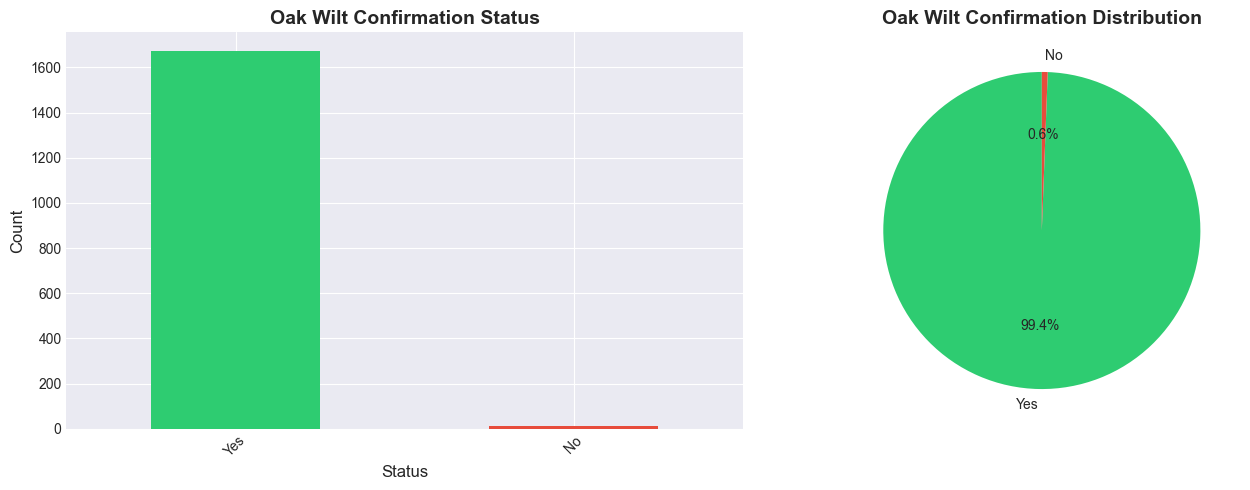

In [6]:
# Oak wilt confirmation breakdown
confirmation_counts = df['OAK_WILT_CONFIRMED'].value_counts()
confirmation_pct = (df['OAK_WILT_CONFIRMED'].value_counts(normalize=True) * 100).round(2)

print("=" * 60)
print("OAK WILT CONFIRMATION STATUS")
print("=" * 60)
for status in confirmation_counts.index:
    print(f"{status}: {confirmation_counts[status]:,} ({confirmation_pct[status]}%)")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
confirmation_counts.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c', '#95a5a6'])
ax1.set_title('Oak Wilt Confirmation Status', fontsize=14, fontweight='bold')
ax1.set_xlabel('Status', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(confirmation_counts, labels=confirmation_counts.index, autopct='%1.1f%%', 
        colors=['#2ecc71', '#e74c3c', '#95a5a6'], startangle=90)
ax2.set_title('Oak Wilt Confirmation Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 7. Species Distribution

TOP 10 SPECIES AFFECTED BY OAK WILT
Live Oak: 1,497
Live Oaks: 97
Live Oak, Red Oak: 60
Live Oaks, Red Oaks: 7
Live Oak, Shumard Oak: 7
Live Oak, Blackjack Oak: 5
Live Oak, Pin Oak: 4
Live Oaks, Red Oak: 4
Live Oak, Red Oak, Shumard Oak: 1


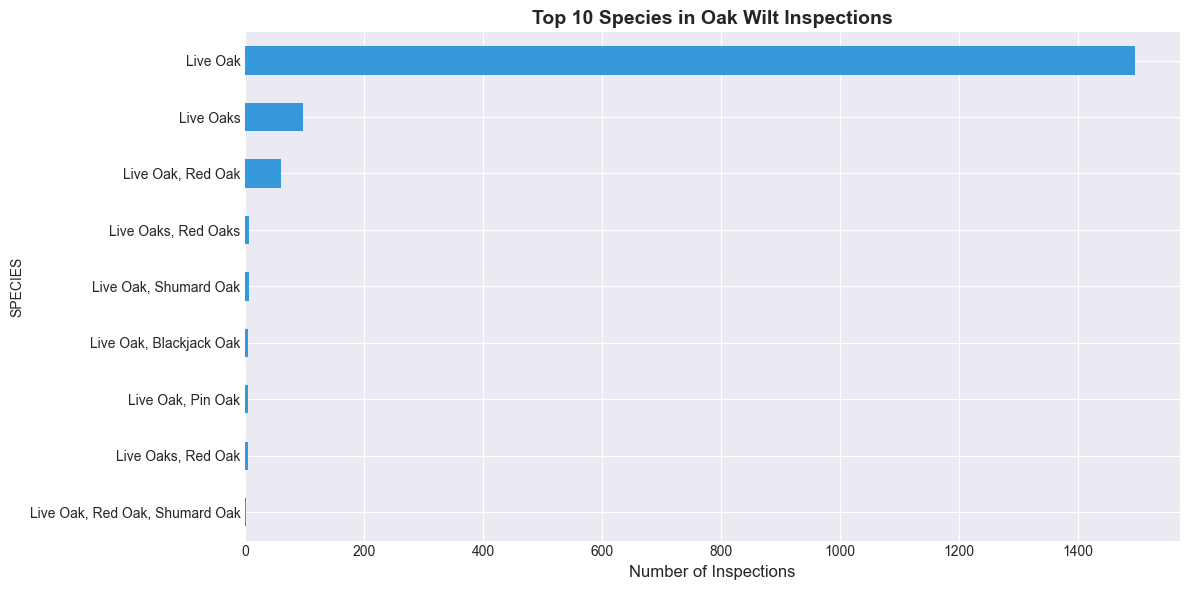

In [7]:
# Top species affected
species_counts = df['SPECIES'].value_counts().head(10)

print("=" * 60)
print("TOP 10 SPECIES AFFECTED BY OAK WILT")
print("=" * 60)
for species, count in species_counts.items():
    print(f"{species}: {count:,}")

# Visualize
plt.figure(figsize=(12, 6))
species_counts.plot(kind='barh', color='#3498db')
plt.xlabel('Number of Inspections', fontsize=12)
plt.title('Top 10 Species in Oak Wilt Inspections', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [8]:
df['SPECIES'].value_counts()

SPECIES
Live Oak                          1497
Live Oaks                           97
Live Oak, Red Oak                   60
Live Oaks, Red Oaks                  7
Live Oak, Shumard Oak                7
Live Oak, Blackjack Oak              5
Live Oak, Pin Oak                    4
Live Oaks, Red Oak                   4
Live Oak, Red Oak, Shumard Oak       1
Name: count, dtype: int64

## 8. Temporal Analysis

INSPECTIONS BY YEAR
Date range: 1986-08-24 00:00:00 to 2024-10-04 00:00:00
Total years covered: 37
Average inspections per year: 45.5



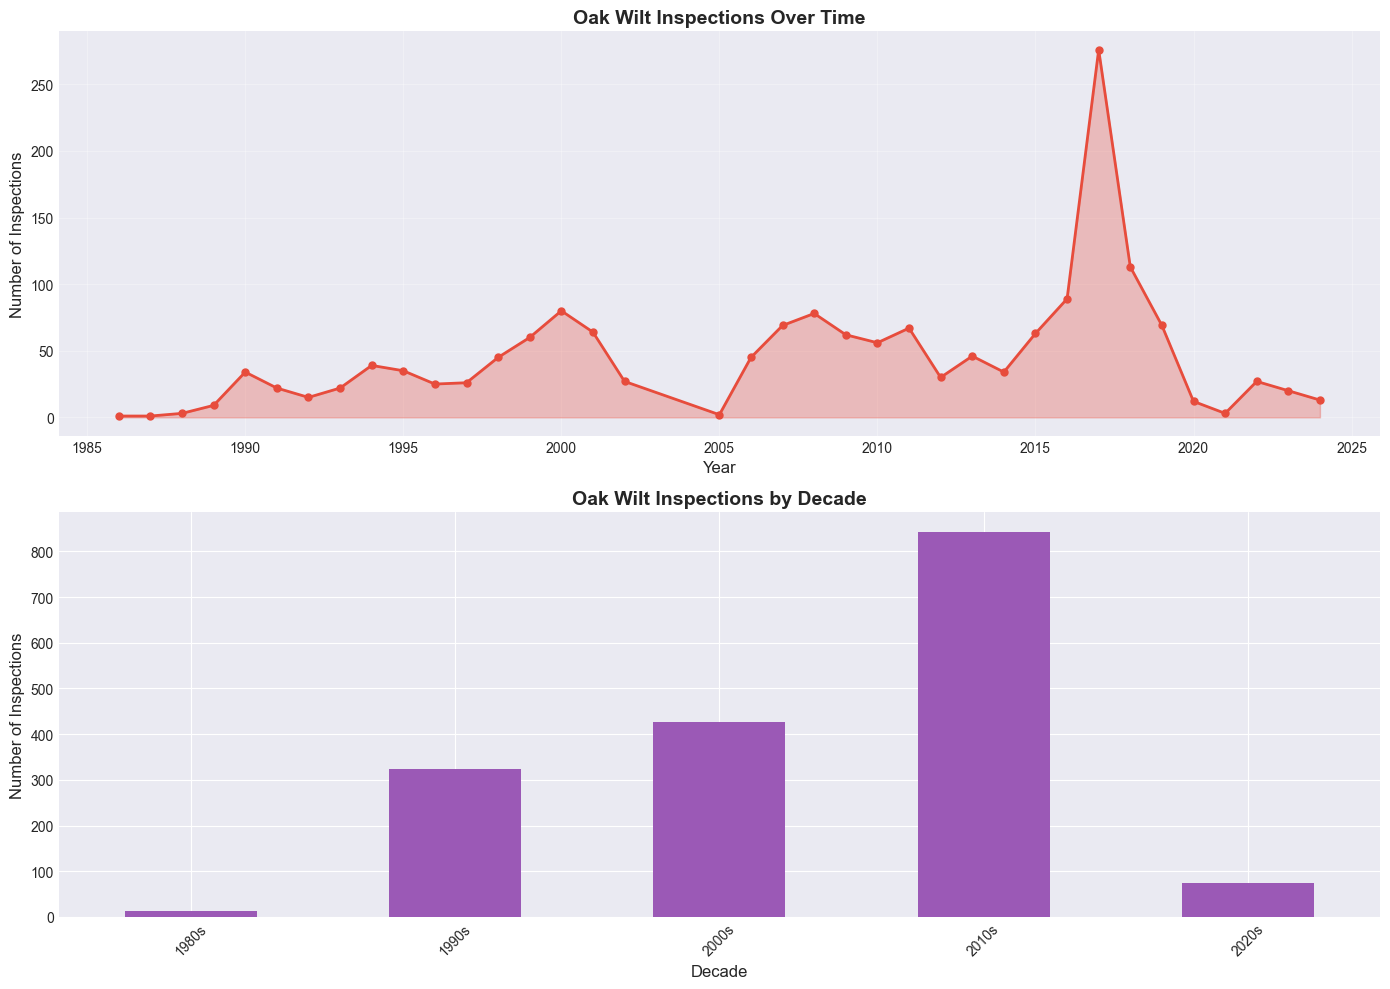

In [9]:
# Convert date column
df['INSPECTION_DATE'] = pd.to_datetime(df['INSPECTION_DATE'], format='%m/%d/%y', errors='coerce')

# Inspections by year
yearly_counts = df['INSPECTION_YEAR'].value_counts().sort_index()

print("=" * 60)
print("INSPECTIONS BY YEAR")
print("=" * 60)
print(f"Date range: {df['INSPECTION_DATE'].min()} to {df['INSPECTION_DATE'].max()}")
print(f"Total years covered: {len(yearly_counts)}")
print(f"Average inspections per year: {yearly_counts.mean():.1f}")
print()

# Visualize
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# By year
ax1.plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2, markersize=5, color='#e74c3c')
ax1.fill_between(yearly_counts.index, yearly_counts.values, alpha=0.3, color='#e74c3c')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Inspections', fontsize=12)
ax1.set_title('Oak Wilt Inspections Over Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# By decade
decade_counts = df['INSPECTION_DECADE'].value_counts().sort_index()
decade_counts.plot(kind='bar', ax=ax2, color='#9b59b6')
ax2.set_xlabel('Decade', fontsize=12)
ax2.set_ylabel('Number of Inspections', fontsize=12)
ax2.set_title('Oak Wilt Inspections by Decade', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


GEOSPATIAL DATA SUMMARY
Records with valid coordinates: 1,682 / 1,682
Percentage complete: 100.0%

Latitude range:
  Min: 30.128891
  Max: 30.491443

Longitude range:
  Min: -97.980707
  Max: -97.651590

Geographic center: (30.278214, -97.793348)



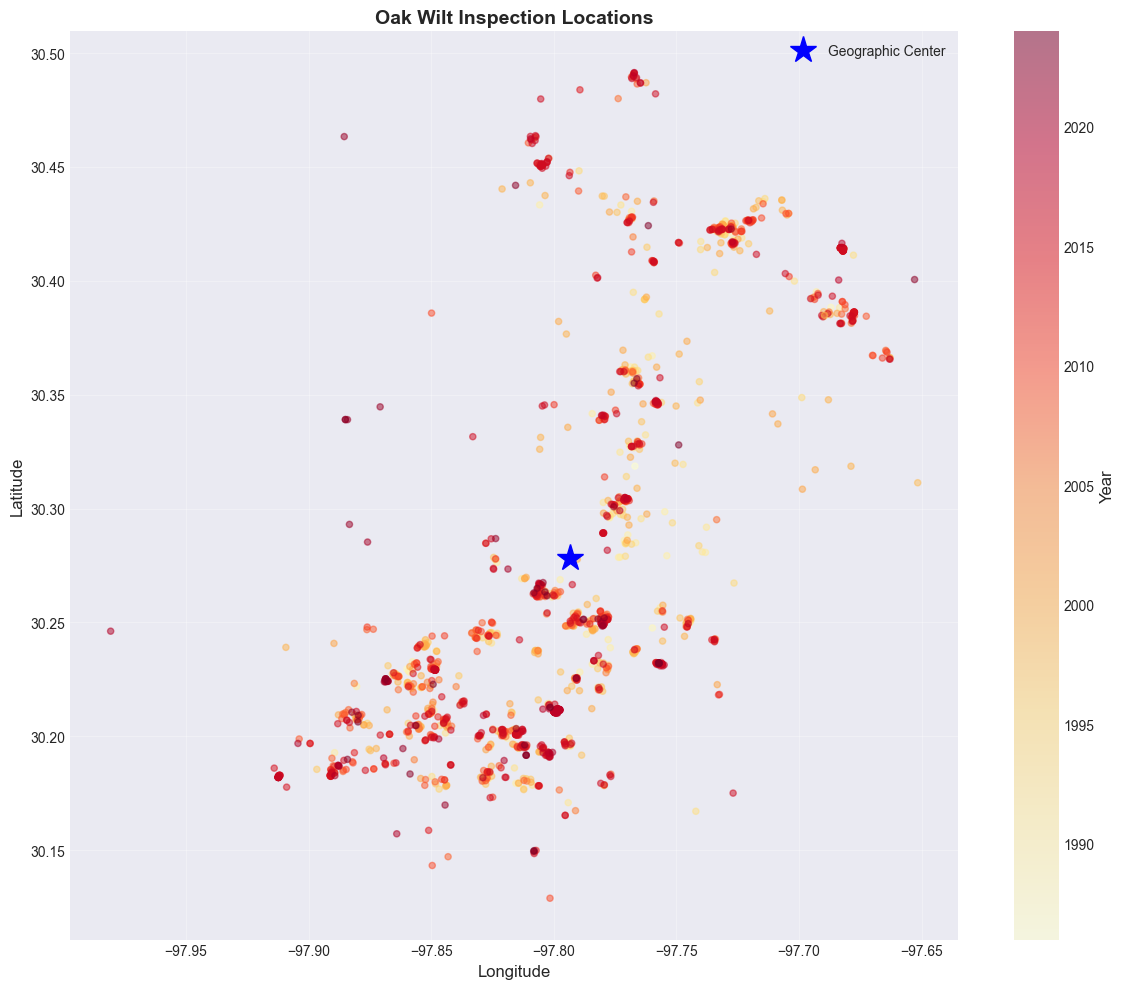

In [10]:
# Check coordinate data
geo_data = df[['LATITUDE', 'LONGITUDE']].dropna()

print("=" * 60)
print("GEOSPATIAL DATA SUMMARY")
print("=" * 60)
print(f"Records with valid coordinates: {len(geo_data):,} / {len(df):,}")
print(f"Percentage complete: {len(geo_data) / len(df) * 100:.1f}%")
print()
print("Latitude range:")
print(f"  Min: {geo_data['LATITUDE'].min():.6f}")
print(f"  Max: {geo_data['LATITUDE'].max():.6f}")
print()
print("Longitude range:")
print(f"  Min: {geo_data['LONGITUDE'].min():.6f}")
print(f"  Max: {geo_data['LONGITUDE'].max():.6f}")
print()

# Geographic center
center_lat = geo_data['LATITUDE'].mean()
center_lon = geo_data['LONGITUDE'].mean()
print(f"Geographic center: ({center_lat:.6f}, {center_lon:.6f})")
print()

# Visualize
fig, ax = plt.subplots(figsize=(12, 10))
scatter = ax.scatter(geo_data['LONGITUDE'], geo_data['LATITUDE'], 
                     c=df.loc[geo_data.index, 'INSPECTION_YEAR'], 
                     cmap='YlOrRd', alpha=0.5, s=20)
ax.plot(center_lon, center_lat, 'b*', markersize=20, label='Geographic Center')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_title('Oak Wilt Inspection Locations', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Year', fontsize=12)
plt.tight_layout()
plt.show()


LANDOWNER TYPE DISTRIBUTION
Unknown        : 1,072 ( 63.7%)
Private        :   302 ( 18.0%)
Municipal - Parkland:   142 (  8.4%)
Public         :    85 (  5.1%)
Municipal - ROW:    62 (  3.7%)
Public - Parkland:     1 (  0.1%)



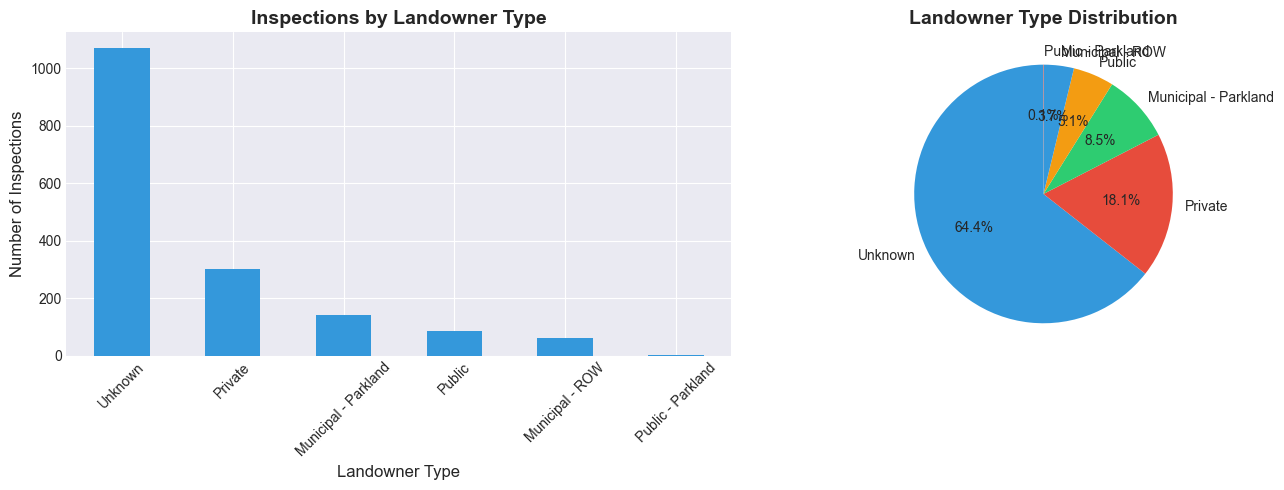

In [11]:
# Landowner type distribution
landowner_counts = df['LANDOWNER_TYPE'].value_counts()
landowner_pct = (landowner_counts / len(df) * 100).round(1)

print("=" * 60)
print("LANDOWNER TYPE DISTRIBUTION")
print("=" * 60)
for owner_type, count in landowner_counts.items():
    pct = landowner_pct[owner_type]
    print(f"{owner_type:15s}: {count:5,} ({pct:5.1f}%)")
print()

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

landowner_counts.plot(kind='bar', ax=ax1, color='#3498db')
ax1.set_xlabel('Landowner Type', fontsize=12)
ax1.set_ylabel('Number of Inspections', fontsize=12)
ax1.set_title('Inspections by Landowner Type', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
ax2.pie(landowner_counts.values, labels=landowner_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Landowner Type Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


SYMPTOM ANALYSIS

Veinal Necrosis:
  Yes       :   645 ( 38.3%)
  No        :     5 (  0.3%)

Mortality Pattern:
  Yes       :   346 ( 20.6%)
  Nearby trees have been injected:     3 (  0.2%)
  No        :     2 (  0.1%)
  Moving fast:     1 (  0.1%)



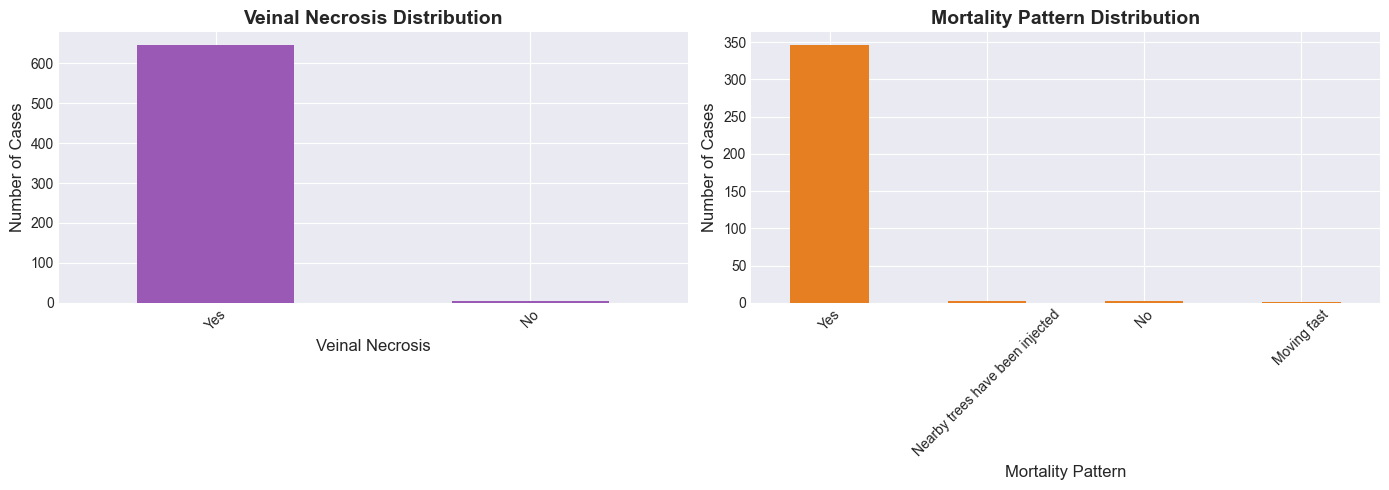

In [12]:
# Analyze symptoms
print("=" * 60)
print("SYMPTOM ANALYSIS")
print("=" * 60)

# Veinal necrosis
veinal_counts = df['SYMPTOM_VEINAL_NECROSIS'].value_counts()
print("\nVeinal Necrosis:")
for symptom, count in veinal_counts.items():
    pct = count / len(df) * 100
    print(f"  {symptom:10s}: {count:5,} ({pct:5.1f}%)")

# Mortality pattern
mortality_counts = df['SYMPTOM_MORTALITY_PATTERN'].value_counts()
print("\nMortality Pattern:")
for symptom, count in mortality_counts.items():
    pct = count / len(df) * 100
    print(f"  {symptom:10s}: {count:5,} ({pct:5.1f}%)")
print()

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

veinal_counts.plot(kind='bar', ax=ax1, color='#9b59b6')
ax1.set_xlabel('Veinal Necrosis', fontsize=12)
ax1.set_ylabel('Number of Cases', fontsize=12)
ax1.set_title('Veinal Necrosis Distribution', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

mortality_counts.plot(kind='bar', ax=ax2, color='#e67e22')
ax2.set_xlabel('Mortality Pattern', fontsize=12)
ax2.set_ylabel('Number of Cases', fontsize=12)
ax2.set_title('Mortality Pattern Distribution', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Get 2024 Oak Wilt Confirmed Cases

In [14]:
oak_wilt_2024 = df[(df['INSPECTION_YEAR'] == 2024) & (df['OAK_WILT_CONFIRMED'] == 'Yes')]
print(f"Found {len(oak_wilt_2024)} oak wilt confirmed cases in 2024")

# Save to CSV
oak_wilt_2024[['Inspection_ID (unique)', 'LATITUDE', 'LONGITUDE', 'OAK_WILT_CONFIRMED', 'INSPECTION_DATE', 'SPECIES']].to_csv('../data/oak_wilt_2024_coordinates.csv', index=False)
print("✓ Oak wilt 2024 coordinates saved to: ../data/oak_wilt_2024_coordinates.csv")

# Display the data
oak_wilt_2024[['Inspection_ID (unique)', 'LATITUDE', 'LONGITUDE', 'OAK_WILT_CONFIRMED', 'INSPECTION_DATE', 'SPECIES']].head(10)

Found 13 oak wilt confirmed cases in 2024
✓ Oak wilt 2024 coordinates saved to: ../data/oak_wilt_2024_coordinates.csv


,Inspection_ID (unique),LATITUDE,LONGITUDE,OAK_WILT_CONFIRMED,INSPECTION_DATE,SPECIES
1669,NaN,30.20,-97.81,Yes,2024-02-05,Live Oak
1670,NaN,30.42,-97.76,Yes,2024-03-13,Live Oak
1671,NaN,30.21,-97.88,Yes,2024-05-14,Live Oak
1672,NaN,30.22,-97.85,Yes,2024-05-29,Live Oak
1673,NaN,30.33,-97.75,Yes,2024-06-05,Live Oak
1674,NaN,30.20,-97.86,Yes,2024-07-11,Live Oak
1675,NaN,30.15,-97.81,Yes,2024-07-12,Live Oak
1676,NaN,30.23,-97.76,Yes,2024-07-24,Live Oak
1677,NaN,30.23,-97.76,Yes,2024-07-24,Live Oak
1678,NaN,30.36,-97.77,Yes,2024-07-24,Live Oak
